# Explorasi dan Visualisasi Data COVID-19 di Jawa Timur 

## BACKGROUND

Saat ini, dunia sedang menghadapi krisis kesehatan secara global dan berdampak terhadap sosial ekonomi dikarenakan COVID-19 yang belum pernah terjadi sebelumnya. Kondisi tersebut semakin mengkhawatirkan dikarenakan telah terjadi lonjakan kasus yang kedua pada bulan Februari 2022.
Indonesia sendiri telah mengokonfirmasi sejak adanya kasus COVID-19 yang pertama kali terjadi, sehingga UNICEF telah memimpin berbagai upaya dalam merespon pandemi ini bersama dengan pemerintah WHO dan mitra lainnya. Sehingga upaya yang bisa dilakukan saat ini oleh pemerintah yaitu pembatasan sosial dan penutupan sekolah berdampak pada pendidikan, kesehatan mental, dan akses kepada pelayanan kesehatan dasar.
Jawa Timur masih menjadi peringkat ke 4, provinsi yang penyumbang kasus covid di Indonesia dengan persentase sebanyak 9.6%.
Maka dari itu dalam artikel ini ingin menggali lebih dalam bagaimana keadaan Covid di Jawa Timur dengan menggunakan data terbaru.
Pemerintah juga melakukan pengumpulan data dan menyediakan data pertumbuhan kasus COVID19 kepada publik. Sebagai salah satu contoh adalah portal covid19.go.id yang telah dilengkapi dengan dasbor dan grafik visualisasi agar masyrakat lebih mudah dalam memahami informasi. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

Sumber: 
https://www.unicef.org/indonesia/id/coronavirus
https://covid19.go.id/peta-sebaran

## Goals

Analisis dan gambaran kasus COVID 19 di Indonesia

## ANALYTIC APPROACH

Melakukan analisa data berdasarkan jumlah kasus meninggal, sembuh, dan total kasus. Setelah itu melakukan analisis deskriptif dalam bentuk grafik dan menjadikan storyline yang lebih koheren. 

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
print(resp.headers)

{'Server': 'nginx', 'Date': 'Wed, 09 Mar 2022 07:51:14 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Wed, 09 Mar 2022 07:45:47 GMT', 'ETag': 'W/"62285b2b-28a12"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [2]:
cov_jatim = resp.json()
cov_jatim

{'last_date': '2022-03-08',
 'provinsi': 'JAWA TIMUR',
 'kasus_total': 554963,
 'kasus_tanpa_tgl': 11,
 'kasus_dengan_tgl': 554952,
 'meninggal_persen': 5.538026859448288,
 'meninggal_tanpa_tgl': 32,
 'meninggal_dengan_tgl': 30702,
 'sembuh_persen': 91.46555716327033,
 'sembuh_tanpa_tgl': 300,
 'sembuh_dengan_tgl': 507300,
 'list_perkembangan': [{'tanggal': 1584489600000,
   'KASUS': 7,
   'MENINGGAL': 1,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 6,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 6},
  {'tanggal': 1584576000000,
   'KASUS': 3,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 3,
   'AKUMULASI_KASUS': 10,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 9},
  {'tanggal': 1584662400000,
   'KASUS': 9,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 9,
   'AKUMULASI_KASUS': 19,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI

In [3]:
print('Length of cov_id_raw : %d.' %len(cov_jatim))
print('Komponen cov_id_raw  : %s.' %cov_jatim.keys())

Length of cov_id_raw : 13.
Komponen cov_id_raw  : dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']).


In [4]:
print('Nama-nama elemen utama:\n', cov_jatim.keys())
print('\nJumlah total kasus COVID-19 di Jawa Timur                 : %d' %cov_jatim['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Timur         : %f.2%%' %cov_jatim['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Timur : %f.2%%' %cov_jatim['sembuh_persen'])


Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Timur                 : 554963
Persentase kematian akibat COVID-19 di Jawa Timur         : 5.538027.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Timur : 91.465557.2%


In [5]:
import pandas as pd
cov_jatim_list = pd.DataFrame(cov_jatim['list_perkembangan'])
print('Info cov_jabar:\n', cov_jatim_list.info())
cov_jatim_list.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       721 non-null    int64
 1   KASUS                         721 non-null    int64
 2   MENINGGAL                     721 non-null    int64
 3   SEMBUH                        721 non-null    int64
 4   DIRAWAT_OR_ISOLASI            721 non-null    int64
 5   AKUMULASI_KASUS               721 non-null    int64
 6   AKUMULASI_SEMBUH              721 non-null    int64
 7   AKUMULASI_MENINGGAL           721 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  721 non-null    int64
dtypes: int64(9)
memory usage: 50.8 KB
Info cov_jabar:
 None


,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
711,1645920000000,3861,52,6238,-2429,531171,469288,30289,31594
712,1646006400000,2233,54,4621,-2442,533404,473909,30343,29152
713,1646092800000,2761,49,5554,-2842,536165,479463,30392,26310
714,1646179200000,4911,57,5359,-505,541076,484822,30449,25805
715,1646265600000,4135,44,5469,-1378,545211,490291,30493,24427
716,1646352000000,2331,60,4574,-2303,547542,494865,30553,22124
717,1646438400000,3651,58,4471,-878,551193,499336,30611,21246
718,1646524800000,2325,42,3685,-1402,553518,503021,30653,19844
719,1646611200000,1410,35,3646,-2271,554928,506667,30688,17573
720,1646697600000,24,14,633,-623,554952,507300,30702,16950


In [9]:
cov_jatim_tidy = (cov_jatim_list.drop(columns=[item for item in cov_jatim_list.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns') #nano second
cov_jatim_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-18,7,1,0
1,2020-03-19,3,0,0
2,2020-03-20,9,0,0
3,2020-03-21,9,1,0
4,2020-03-22,14,0,0


C:\Users\DELL\AppData\Local\Temp/ipykernel_16916/1339065925.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

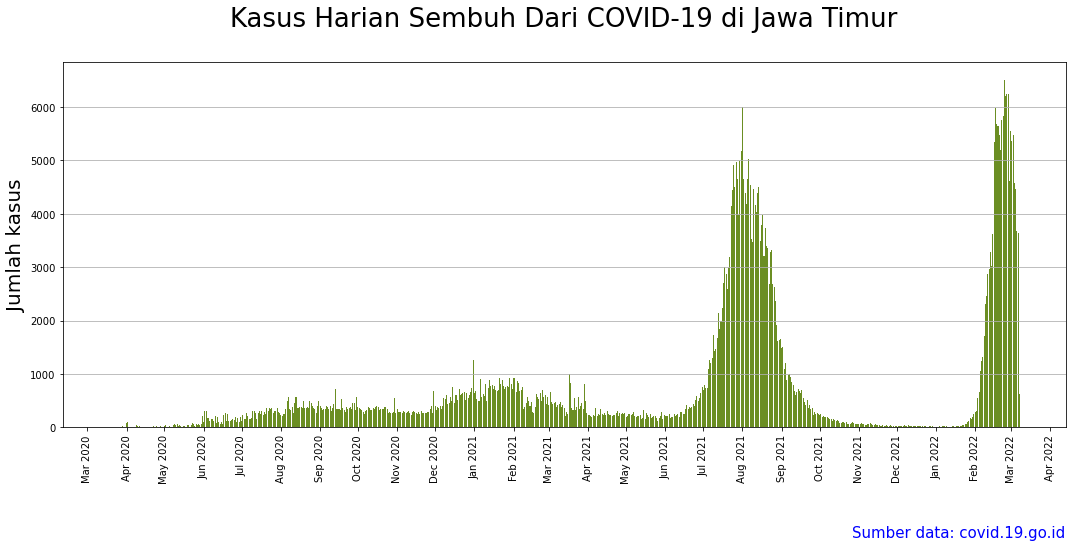

In [10]:
#menunjukan melalui gambar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf() #untuk menghapus figure sebelumnya klo plt.close mengahpus seluruh gambar jd mending pakai plt.clf
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Timur\n',
             fontsize=26)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', fontsize=15,
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_11740/2225786217.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

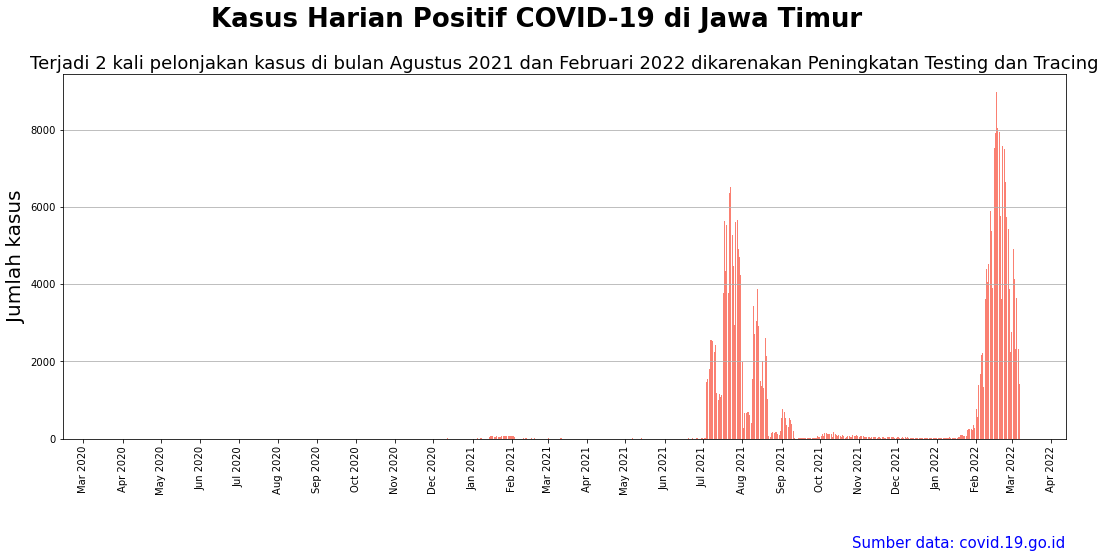

In [52]:
# ADD INFO GRAFIK(jadinya seperti storyline singkat)
plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Timur', 
             y=1.00, fontsize=26, fontweight='bold', ha='center')
ax.set_title('Terjadi 2 kali pelonjakan kasus di bulan Agustus 2021 dan Februari 2022 dikarenakan Peningkatan Testing dan Tracing',
             fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', fontsize=15,
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')  #y biar gridnya vertikal, klo x nanti jadinya horizontal
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_16916/888456866.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

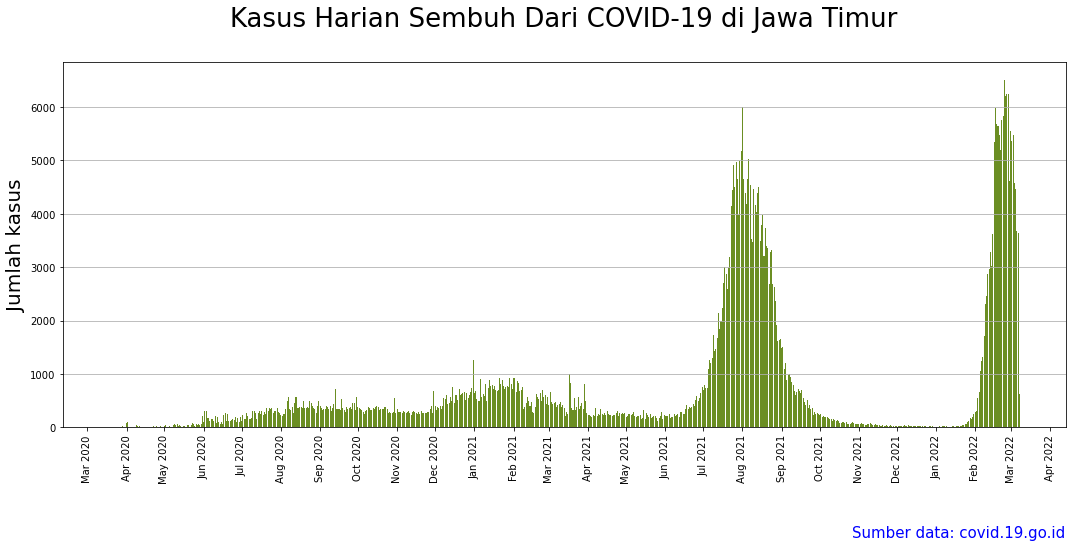

In [11]:
#GRAFIK UNTUK KASUS SEMBUH
plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='sembuh', color='olivedrab') #krn yg diminta kasus sembuh
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Timur\n',
             fontsize=26)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', fontsize=15,
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_11740/3237258179.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

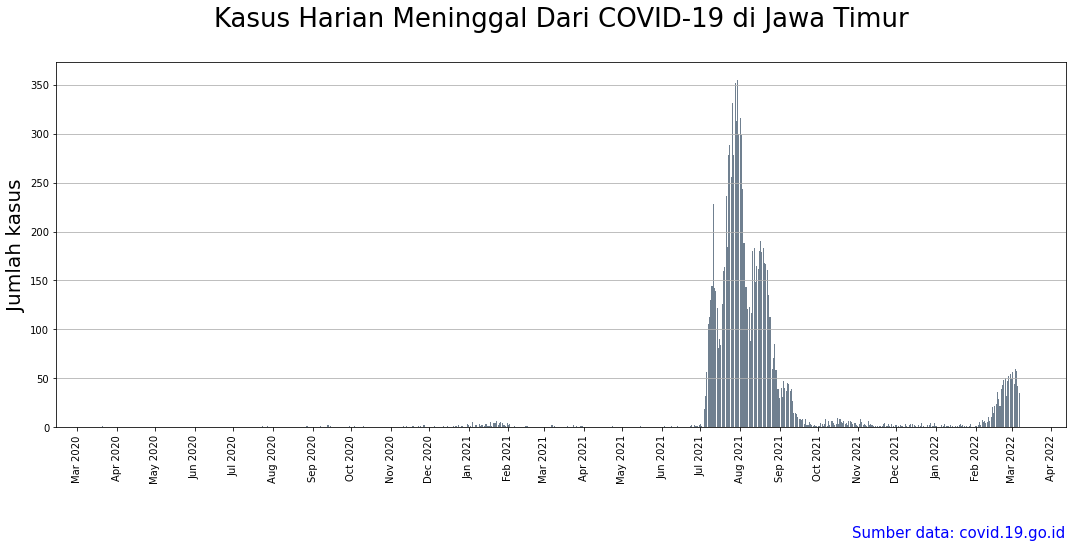

In [41]:
#Grafik untuk Kasus Meninggal
plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Timur\n',
             fontsize=26)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', fontsize=15, transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) #format menjadi singkatan bulan dan taunnya saja 

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
#perkembangan kasus dalam rentang waktu pekanan
cov_jatim_pekan = (cov_jatim_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W') #menjadikan frekuensi total kasus secara pekanan 
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jatim_pekan['tahun'] = cov_jatim_pekan['tanggal'].apply(lambda x: x.year) #membuat kolom baru berupa tahun 
cov_jatim_pekan['pekan_ke'] =cov_jatim_pekan['tanggal'].apply(lambda x:x.weekofyear) # membuat kolom baru urutan pekan dalam setahunnya 
cov_jatim_pekan = cov_jatim_pekan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jatim_pekan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jatim_pekan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     104 non-null    int64
 1   pekan_ke  104 non-null    int64
 2   jumlah    104 non-null    int64
dtypes: int64(3)
memory usage: 2.6 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        12      42
1   2020        13      56
2   2020        14     104
3   2020        15     221
4   2020        16     213


In [16]:
#membandingkan jumlah kasus per pekan dari pekan lalu dengan jumlah pekan berikutnya
import numpy as np
cov_jatim_pekan['jumlah_pekanlalu'] = cov_jatim_pekan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jatim_pekan['apa_lebih_baik'] = cov_jatim_pekan['jumlah'] < cov_jatim_pekan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jatim_pekan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  apa_lebih_baik
0   2020        12      42                 0           False
1   2020        13      56                42           False
2   2020        14     104                56           False
3   2020        15     221               104           False
4   2020        16     213               221            True
5   2020        17     192               213            True
6   2020        18     332               192           False
7   2020        19     402               332           False
8   2020        20     673               402           False
9   2020        21    1455               673           False


C:\Users\DELL\AppData\Local\Temp/ipykernel_16916/435051251.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jatim_pekan['jumlah_pekanlalu'] = cov_jatim_pekan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


<Figure size 432x288 with 0 Axes>

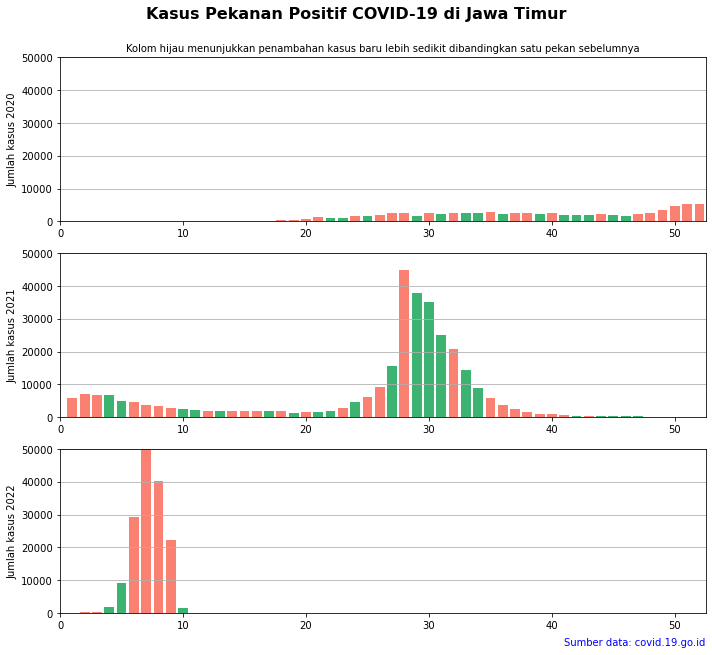

In [17]:
# menambahkan bar chart untuk menjawab pertanyaan apakah pekan kedepannya lebih baik dari pekan sebelumnya
plt.clf()
jml_tahun_terjadi_covid19 = cov_jatim_pekan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jatim_pekan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Timur',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jatim_pekan.loc[cov_jatim_pekan['tahun']==tahun_terjadi_covid19[i]],
           x='pekan_ke', height='jumlah',
           color=['mediumseagreen' if x is True else 'salmon'
                  for x in cov_jatim_pekan['apa_lebih_baik']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
                ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jatim_pekan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [18]:
# menghitung jumlah kasus aktif dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal
cov_jatim_akumulasi = cov_jatim_tidy[['tanggal']].copy()
cov_jatim_akumulasi['akumulasi_aktif'] = (cov_jatim_tidy['kasus_baru'] - cov_jatim_tidy['sembuh'] - cov_jatim_tidy['meninggal']).cumsum()
cov_jatim_akumulasi['akumulasi_sembuh'] = cov_jatim_tidy['sembuh'].cumsum()
cov_jatim_akumulasi['akumulasi_meninggal'] = cov_jatim_tidy['meninggal'].cumsum()
print(cov_jatim_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
716 2022-03-04            22124            494865                30553
717 2022-03-05            21246            499336                30611
718 2022-03-06            19844            503021                30653
719 2022-03-07            17573            506667                30688
720 2022-03-08            16950            507300                30702


In [21]:
cov_jatim_akumulasi.describe()

,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
count,721.000000,721.000000,721.000000
mean,6032.780860,160016.166436,12938.203883
std,10630.184455,147503.571362,11389.039301
min,-735.000000,0.000000,1.000000
25%,570.000000,31903.000000,3194.000000
50%,2328.000000,119129.000000,9289.000000
75%,5474.000000,353816.000000,28934.000000
max,55604.000000,507300.000000,30702.000000


In [23]:
cov_jatim_akumulasi.loc[cov_jatim_akumulasi['akumulasi_aktif'].idxmax()]

tanggal                2021-07-29 00:00:00
akumulasi_aktif                      55604
akumulasi_sembuh                    222950
akumulasi_meninggal                  19934
Name: 498, dtype: object

C:\Users\DELL\AppData\Local\Temp/ipykernel_16916/1985072553.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

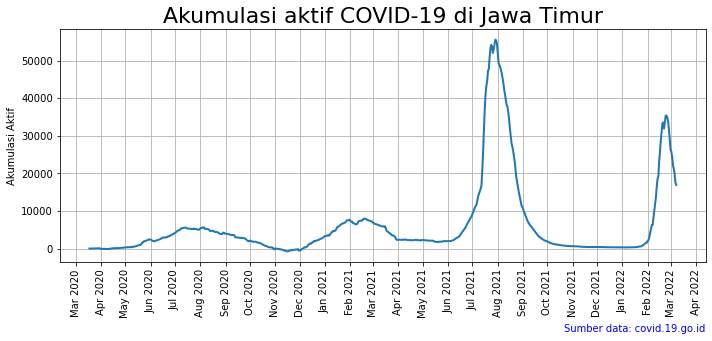

In [50]:
# membuat linechart akumulasi kasus aktif
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jatim_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('  ')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

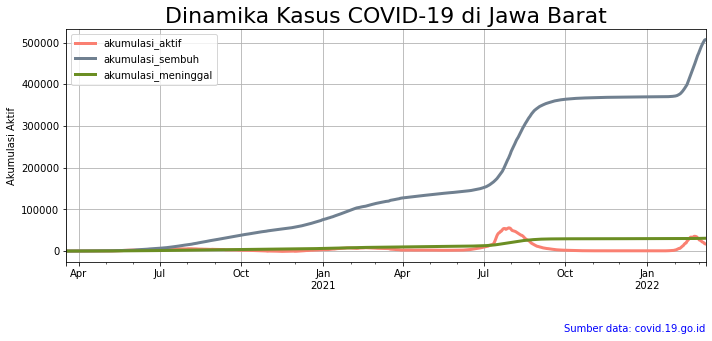

In [20]:
#membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jatim_akumulasi_ts = cov_jatim_akumulasi.set_index('tanggal')
cov_jatim_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                     color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
         fontsize=22)
ax.set_xlabel(' ')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
      ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()
